In [39]:
# Retirar a pontuação, acentuação ()
# Fazer a transformação com bag of words e TF-IDF
# Dividir o conjunto de dados em treino(75%) e teste(25%)
# Implementar 5 classificadores, avaliar a perfomace
# - - - - - -- - - - -- - - - - - -- - - - -- - - - - - -- - - - -- - - 
# Avaliar outras formas de tratamento de texto, retirar o radical... 
# - - - - - -- - - - -- - - - - - -- - - - -- - - - - - -- - - - -- - - 
# Implementar API, com fast-API (Avaliar formas de deploy de modelos)
# Implementar MVP de teste, sugestão seria uma loja


In [40]:
import pandas as pd
import plotly.express as px
import numpy as np

PLN Transformation
- bag of words
- TF-IDF

In [41]:
df = pd.read_csv("/Users/rodolforicardo/Downloads/datadiscoveryone/data/raw/olist_order_reviews_dataset.csv")

In [42]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [43]:
# selecionando as colunas válidas para o projeto
selected = df[['review_score', 'review_comment_message']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cf6b750>]],
      dtype=object)

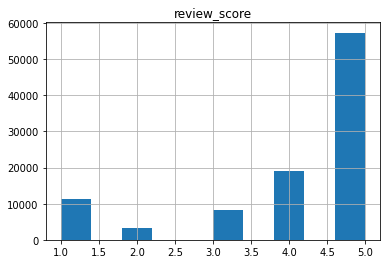

In [44]:
selected.hist()

In [45]:
# contando quantos elementos nulos existem
selected.isnull().sum()

review_score                  0
review_comment_message    58247
dtype: int64

In [46]:
# eliminando os valores nulos e adicionando à outra variável
selected_na = selected.dropna()

In [47]:
# passando a variável para um dataframe chamado dataframe
dataframe = pd.DataFrame(selected_na)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118698050>]],
      dtype=object)

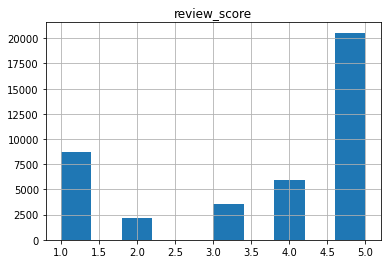

In [48]:
dataframe.hist()

In [49]:
# Passando todas as palavras para minúsculo
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.lower()

In [50]:
import string
caracteres = string.punctuation

In [51]:
caracteres

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
# removendo caracteres especiais OBS: só consegui utilizando uma expressão regular. Existe outra forma?
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", " ")

In [53]:
dataframe

,review_score,review_comment_message
3,5,recebi bem antes do prazo estipulado
4,5,parabéns lojas lannister adorei comprar pela i...
9,4,aparelho eficiente no site a marca do aparelh...
12,4,mas um pouco travando pelo valor ta boa \r\n
15,5,vendedor confiável produto ok e entrega antes...
...,...,...
99205,4,para este produto recebi de acordo com a compr...
99208,5,entregou dentro do prazo o produto chegou em ...
99215,3,o produto não foi enviado com nf não existe v...
99221,5,excelente mochila entrega super rápida super...


In [55]:
# pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

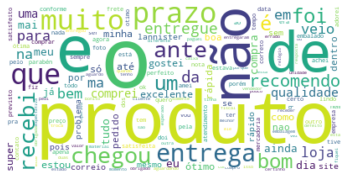

In [56]:
# plotando uma nuvem de palavras
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Creating the text variable

text2 = " ".join(title for title in dataframe.review_comment_message)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

In [57]:
casasgot = ['stark','lannister','targaryen','greyjoy','baratheon','martell','tyrell','bolton']

In [58]:
# tentei por esse método e não deu certo :/
#dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace(r"casasgot", "")

In [59]:
# removendo os nomes das casas de Game of Thrones na "força bruta"

dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace('lannister', " ")
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace('stark', " ")
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace('targaryen', " ")
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace('greyjoy', " ")
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace('baratheon', " ")
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace('martell', " ")
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace('tyrell', " ")
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.replace('bolton', " ")

In [60]:
dataframe

,review_score,review_comment_message
3,5,recebi bem antes do prazo estipulado
4,5,parabéns lojas adorei comprar pela internet ...
9,4,aparelho eficiente no site a marca do aparelh...
12,4,mas um pouco travando pelo valor ta boa \r\n
15,5,vendedor confiável produto ok e entrega antes...
...,...,...
99205,4,para este produto recebi de acordo com a compr...
99208,5,entregou dentro do prazo o produto chegou em ...
99215,3,o produto não foi enviado com nf não existe v...
99221,5,excelente mochila entrega super rápida super...


In [61]:
# removendo os acentos
dataframe['review_comment_message'] = dataframe['review_comment_message'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [62]:
dataframe

,review_score,review_comment_message
3,5,recebi bem antes do prazo estipulado
4,5,parabens lojas adorei comprar pela internet ...
9,4,aparelho eficiente no site a marca do aparelh...
12,4,mas um pouco travando pelo valor ta boa \r\n
15,5,vendedor confiavel produto ok e entrega antes...
...,...,...
99205,4,para este produto recebi de acordo com a compr...
99208,5,entregou dentro do prazo o produto chegou em ...
99215,3,o produto nao foi enviado com nf nao existe v...
99221,5,excelente mochila entrega super rapida super...


In [63]:
# adicionando uma variavel chamada STOPWRODS e lendo um arquivo com stopwords em português
stopwords0 = pd.read_csv("/Users/rodolforicardo/Downloads/datadiscoveryone/data/raw/stopwords.txt", sep=" ", header=None)

In [64]:
stopwords = stopwords0[0].values.tolist()

In [66]:
# stopwords

In [67]:
# removendo stopwords com expressão regular novamente
lista = r'\b(?:{})\b'.format('|'.join(stopwords))
semacento = dataframe['review_comment_message'].str.replace(lista, '')

(-0.5, 399.5, 199.5, -0.5)

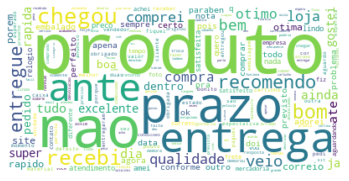

In [68]:
text3 = " ".join(title for title in semacento)

# Creating word_cloud with text as argument in .generate() method

word_cloud3 = WordCloud(collocations = False, background_color = 'white').generate(text3)

# Display the generated Word Cloud

plt.imshow(word_cloud3, interpolation='bilinear')

plt.axis("off")

In [26]:
msgs[msgs['review_score'] < 3]

NameError: name 'msgs' is not defined

In [8]:
msgs = df[['review_score','review_comment_message']].dropna()#.unique()
cont = 0
for star,review in (msgs).values:
    print(star,review)
    cont += 1
    if cont>30 and cont <40:
        break
#    print(msgs[np.random.randint(len(msgs)-1)])

5 Recebi bem antes do prazo estipulado.
5 Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa
4 aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho
4 Mas um pouco ,travando...pelo valor ta Boa.

5 Vendedor confiável, produto ok e entrega antes do prazo.
2 GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E ESSA COMPRA AGORA ME DECPCIONOU
1 Péssimo
5 Loja nota 10
5 obrigado pela atençao amim dispensada
5 A compra foi realizada facilmente.
A entrega foi efetuada muito antes do prazo dado.
O produto já começou a ser usado e até o presente,
sem problemas.
5 relógio muito bonito e barato.
1 Não gostei ! Comprei gato por lebre
1 Sempre compro pela Internet e a entrega ocorre antes do prazo combinado, que acredito ser o prazo máximo. No stark o prazo máximo já se esgotou e ainda não recebi o produto.
4 Recebi exatamente o que es

In [9]:
#https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products